In [48]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.messages import AnyMessage
from langchain.messages import HumanMessage
from typing import Annotated
from pydantic import BaseModel

In [49]:
class State(BaseModel):
    messages: Annotated[list[AnyMessage], add_messages]

In [50]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [51]:
from langchain_groq import ChatGroq


llm = ChatGroq(model="qwen/qwen3-32b")

In [52]:
def superbot(state: State):
    return {"messages": [llm.invoke(state.messages)]}

In [53]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

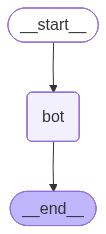

In [55]:
from IPython.display import display, Image
builder = StateGraph(State)

builder.add_node("bot", superbot)

builder.add_edge(START, "bot")
builder.add_edge("bot", END)

graph = builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [56]:
config = {"configurable": {"thread_id": "test"}}
msgs = graph.invoke({"messages": [HumanMessage(content="Hello, what's up?")]}, config=config)

for msg in msgs["messages"]:
    msg.pretty_print()

================================ Human Message =================================

Hello, what's up?
================================== Ai Message ==================================

<think>
Okay, the user is asking "Hello, what's up?" which is a casual greeting. I need to respond in a friendly and open way. Let me start with a greeting and offer assistance. I should keep it simple and approachable. Maybe something like, "Hi there! Just chilling here. How can I assist you today?" That sounds good. It's friendly and invites them to ask for help with whatever they need. I'll go with that.
</think>

Hi there! Just chilling here. How can I assist you today? 😊


In [59]:
# create thread
config = {"configurable": {"thread_id": "stream_test"}}

for chunk in graph.stream({"messages": ["My name is John Doe. I like indian cusine."]}, config=config, stream_mode="updates"):
    print(chunk)

{'bot': {'messages': [AIMessage(content="<think>\nOkay, the user mentioned their name is John Doe and they like Indian cuisine again. Let me check the history. Oh, right, they already provided that info in the previous message. The assistant acknowledged it and asked more about favorite dishes and how they discovered Indian food.\n\nNow, the user is repeating the same message. Maybe they want to continue the conversation or there's a typo. Since the assistant already responded, maybe the user didn't get a reply they were expecting or they want to reiterate their interest. Let me make sure to acknowledge the repetition and perhaps prompt them to ask a specific question or share more details about their preferences. Maybe they want recipe suggestions, cultural aspects, or something else related to Indian cuisine. The assistant should stay friendly and open-ended to encourage further interaction. Also, avoid repeating the same response to prevent redundancy. Let me craft a response that i

In [60]:
# create thread
config = {"configurable": {"thread_id": "stream_test"}}

for chunk in graph.stream({"messages": ["Hello, who am I? And what you know about me"]}, config=config, stream_mode="updates"):
    print(chunk)

{'bot': {'messages': [AIMessage(content='<think>\nOkay, the user asked, "Hello, who am I? And what you know about me." Let me look at the conversation history.\n\nFirst, the user introduced himself as John Doe and mentioned he likes Indian cuisine. The assistant welcomed him and asked about his favorite dishes. The user repeated his name and interest, so the assistant acknowledged the repetition and asked for more details about his preferences. Now, the user is asking who he is and what the assistant knows about him.\n\nHmm, the user might be testing if the assistant remembers the conversation. They might want to confirm their identity or check if the assistant keeps track of previous messages. The user could be concerned about privacy or just curious about how the assistant processes information.\n\nI need to make sure the response is clear and addresses both parts of the question. First, confirm the user\'s identity as John Doe who likes Indian cuisine. Then, explain that the assista

In [61]:
for chunk in graph.stream({"messages": ["What's going on in the world?"]}, config=config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='My name is John Doe. I like indian cusine.', additional_kwargs={}, response_metadata={}, id='a7f431c7-486a-470c-a814-273ed0df0f11'), AIMessage(content='<think>\nOkay, so the user introduced himself as John Doe and mentioned he likes Indian cuisine. I need to respond appropriately. Let me start by acknowledging his name and his interest.\n\nFirst, greeting him warmly. Maybe say something like, "Hello, John Doe! Welcome!" Then, express enthusiasm about his liking for Indian food. Ask him if there\'s a particular dish he enjoys the most. Maybe list some popular ones like butter chicken, biryani, or samosas to give him options and show I know a bit about Indian cuisine.\n\nAlso, consider if he wants to know more about Indian food, maybe recipes or restaurants. Offer to help with that. Keep the tone friendly and open-ended so he feels comfortable elaborating. Avoid any assumptions beyond what he\'s stated. Check for any cultural nuances, but since he\'s a